In [1]:
import logging
from large_gcs.graph_generators.contact_graph_generator import (
    ContactGraphGeneratorParams,
    ContactGraphGenerator,
)
from large_gcs.graph.contact_graph import ContactGraph
from large_gcs.algorithms.search_algorithm import TieBreak, ReexploreLevel
from large_gcs.algorithms.gcs_naive_astar import GcsNaiveAstar
from large_gcs.cost_estimators.shortcut_edge_ce import ShortcutEdgeCE

from large_gcs.graph.incremental_contact_graph import IncrementalContactGraph

import numpy as np

np.set_printoptions(formatter={"float": lambda x: "{0:0.3f}".format(x)})
logging.basicConfig(level=logging.INFO)
logging.getLogger("large_gcs").setLevel(logging.INFO)
logging.getLogger("drake").setLevel(logging.WARNING)

In [2]:
cg = IncrementalContactGraph.load_from_file(
    ContactGraphGeneratorParams.inc_graph_file_path_from_name("cg_simple_4"),
    should_use_l1_norm_vertex_cost=True,
    should_incl_simul_mode_switches=False,
    should_add_const_edge_cost=True,
)
# cg = ContactGraph.load_from_file(
#     ContactGraphGeneratorParams.graph_file_path_from_name("cg_simple_4"),
#     should_use_l1_norm_vertex_cost=True
# )

# cg = IncrementalContactGraph.load_from_file(
#     ContactGraphGeneratorParams.inc_graph_file_path_from_name("cg_maze_b1"),
# )

INFO:large_gcs.graph.contact_graph:Creating vertex costs...


Set parameter Username
Academic license - for non-commercial use only - expires 2025-06-05


100%|██████████| 2/2 [00:00<00:00, 52103.16it/s]
INFO:large_gcs.graph.graph:Adding 2 vertices to graph...
100%|██████████| 2/2 [00:00<00:00, 28826.83it/s]
INFO:large_gcs.graph.contact_graph:Generating contact pair modes for 3 body pairs...
100%|██████████| 3/3 [00:00<00:00, 186.49it/s]
INFO:large_gcs.graph.incremental_contact_graph:Calculating adjacent contact pair modes (62)
100%|██████████| 62/62 [00:00<00:00, 14061.91it/s]


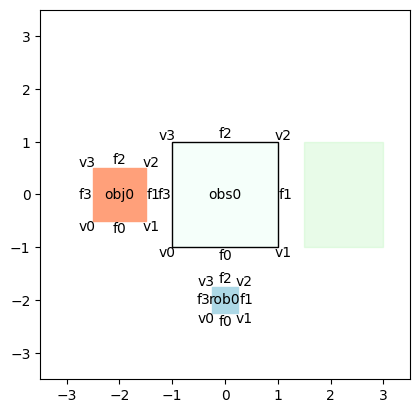

In [3]:
cg.plot()

In [4]:
# vertex_path = [
#     "('NC|obs0_f1-obj0_v1', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f0-rob0_v1')",
#     "('NC|obs0_v1-obj0_f0', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f0-rob0_v1')",
#     "('NC|obs0_v1-obj0_f0', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f1-rob0_f1')",
#     "('NC|obs0_v1-obj0_f0', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')",
#     "('NC|obs0_v1-obj0_f0', 'NC|obs0_v1-rob0_f2', 'IC|obj0_f1-rob0_f1')",
#     "('NC|obs0_v1-obj0_f0', 'NC|obs0_f1-rob0_v0', 'IC|obj0_f1-rob0_f1')",
#     "('NC|obs0_v0-obj0_f1', 'NC|obs0_f1-rob0_v0', 'IC|obj0_f1-rob0_f1')",
#     "('NC|obs0_v0-obj0_f1', 'NC|obs0_f1-rob0_v0', 'NC|obj0_f1-rob0_f1')",
#     "('NC|obs0_v0-obj0_f1', 'NC|obs0_f1-rob0_v0', 'NC|obj0_f2-rob0_f2')",
#     "('NC|obs0_v0-obj0_f1', 'NC|obs0_f1-rob0_v0', 'IC|obj0_f2-rob0_f2')",
#     "target",
# ]

In [5]:
# cost_estimator_se = ShortcutEdgeCE(
#     cg, contact_shortcut_edge_l2norm_cost_factory_obj_weighted
# )
from large_gcs.algorithms.gcs_star import GcsStar
from large_gcs.domination_checkers.sampling_last_pos import ReachesNewLastPosSampling
from large_gcs.graph.contact_cost_constraint_factory import contact_shortcut_edge_l1norm_cost_factory_obj_weighted


cost_estimator_se = ShortcutEdgeCE(
    cg, contact_shortcut_edge_l1norm_cost_factory_obj_weighted
)
# domination_checker=ReachesNewLastPosSampling(cg, 1)
# alg = GcsStar(graph=cg, cost_estimator=cost_estimator_se, domination_checker=domination_checker, heuristic_inflation_factor=10)
alg = GcsNaiveAstar(
    cg,
    cost_estimator=cost_estimator_se,
    reexplore_level=ReexploreLevel.PARTIAL,
    heuristic_inflation_factor=10,
    terminate_early=True,
)
sol_se = alg.run(
    # visualize_intermediate=True, 
    #intermediate_vertices_to_visualize=vertex_path
)

INFO:large_gcs.algorithms.gcs_naive_astar:Running GcsNaiveAstar, reexplore_level: ReexploreLevel.PARTIAL
INFO:large_gcs.algorithms.search_algorithm:iter: 0
n_vertices_expanded: 1, n_vertices_visited: 0, time_wall_clock: 0, n_gcs_solves: 0, gcs_solve_time_total: 0, gcs_solve_time_iter_mean: 0, gcs_solve_time_last_10_mean: 0, gcs_solve_time_iter_std: 0, gcs_solve_time_iter_min: inf, gcs_solve_time_iter_max: 0, n_vertices_reexpanded: 0, n_vertices_revisited: 0, n_Q: 0, n_S: 0, n_S_pruned: 0, method_times: {'_generate_successors': 4.0531158447265625e-06}, method_counts: {'_generate_successors': 1}, expansion_order: []
now exploring node source's 1 neighbors (0)
INFO:large_gcs.algorithms.search_algorithm:iter: 1
n_vertices_expanded: 2, n_vertices_visited: 1, time_wall_clock: 0.00119, n_gcs_solves: 1, gcs_solve_time_total: 0.00015, gcs_solve_time_iter_mean: 0.00015, gcs_solve_time_last_10_mean: 0, gcs_solve_time_iter_std: 0, gcs_solve_time_iter_min: 0.00015, gcs_solve_time_iter_max: 0.00015,

In [6]:
sol_se

ShortestPathSolution(is_success=True, cost=28.499999999999982, time=0.00023603439331054688, vertex_path=['source', "('NC|obs0_f3-obj0_f1', 'NC|obs0_f0-rob0_f2', 'NC|obj0_f0-rob0_f2')", "('NC|obs0_f3-obj0_f1', 'NC|obs0_f3-rob0_f1', 'NC|obj0_f0-rob0_f2')", "('NC|obs0_f3-obj0_f1', 'NC|obs0_f3-rob0_f1', 'IC|obj0_f3-rob0_f1')", "('NC|obs0_f3-obj0_f1', 'NC|obs0_f3-rob0_f1', 'IC|obj0_f0-rob0_f2')", "('IC|obs0_f2-obj0_f0', 'NC|obs0_f3-rob0_f1', 'IC|obj0_f0-rob0_f2')", "('IC|obs0_f2-obj0_f0', 'NC|obs0_f3-rob0_f1', 'IC|obj0_f3-rob0_f1')", "('IC|obs0_f2-obj0_f0', 'NC|obs0_f2-rob0_f0', 'IC|obj0_f3-rob0_f1')", "('NC|obs0_f1-obj0_f3', 'NC|obs0_f2-rob0_f0', 'IC|obj0_f3-rob0_f1')", "('NC|obs0_f1-obj0_f3', 'NC|obs0_f2-rob0_f0', 'IC|obj0_f2-rob0_f0')", 'target'], trajectory=[array([-2.000, 0.000, 0.000, -2.000]), array([-2.000, -2.000, 0.000, 0.000, 0.000, -1.250, -2.000, -1.250,
       -1.250, 0.750]), array([-2.000, -2.000, 0.000, 0.000, -1.250, -2.750, -1.250, -0.750,
       -1.500, 0.500]), array([-

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -framerate 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /tmp/tmp13rsh7hu/temp.m4v


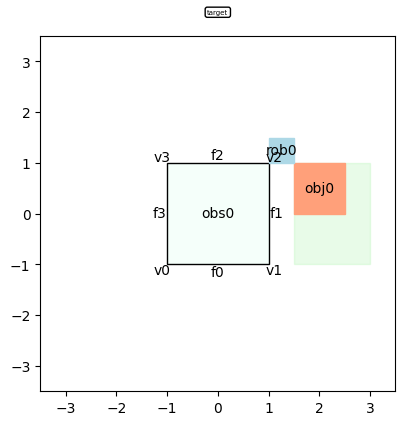

In [7]:
from IPython.display import HTML
anim = cg.animate_solution()
HTML(anim.to_html5_video())